In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [2]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

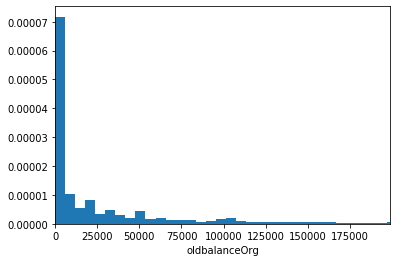

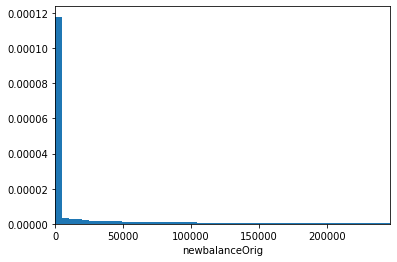

In [4]:
plt.hist(data['oldbalanceOrg'], density=True, bins=10000)  # `density=False` would make counts
plt.xlim(np.percentile(data['oldbalanceOrg'].values, 5), np.percentile(data['oldbalanceOrg'].values, 80))
# plt.ylabel('Probability')
plt.xlabel('oldbalanceOrg')
plt.show()

plt.hist(data['newbalanceOrig'], density=True, bins=10000)  # `density=False` would make counts
plt.xlim(np.percentile(data['newbalanceOrig'].values, 5), np.percentile(data['newbalanceOrig'].values, 80))
# plt.ylabel('Probability')
plt.xlabel('newbalanceOrig')
plt.show()

In [5]:
# convert the columns as Category
data['type'] = data['type'].astype('category')
data['type'] = data['type'].cat.codes
data['nameOrig'] = data['nameOrig'].astype('category')
data['nameOrig'] = data['nameOrig'].cat.codes
data['nameDest'] = data['nameDest'].astype('category')
data['nameDest'] = data['nameDest'].cat.codes
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [6]:
labels = ['isFraud', 'isFlaggedFraud']
y = data[labels]
y.head()

,isFraud,isFlaggedFraud
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0


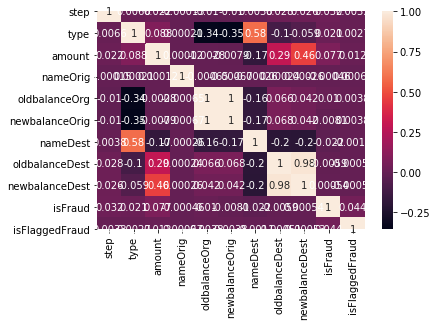

In [7]:
sns.heatmap(data.corr(), annot=True)

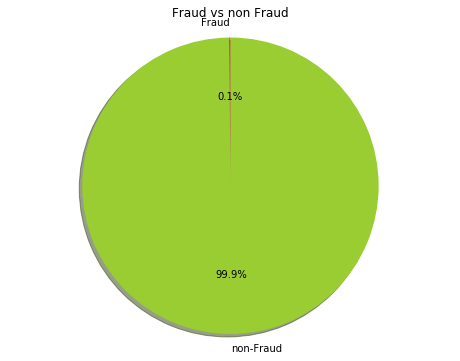

In [8]:

x =len(data[data['isFraud'] == 1])
y = len(data[data['isFraud']== 0])
plt.figure(figsize=(8,6))
# Data to plot
plt.title('Fraud vs non Fraud')
labels = 'Fraud','non-Fraud'
sizes = [x,y]
colors = ['red', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

y = data["isFraud"]
X = data.drop("isFraud", axis=1)
X = X.drop("isFlaggedFraud", axis=1)
X = X.drop("nameOrig", axis=1)
X = X.drop("nameDest", axis=1)
# X = data.drop("isFlaggedFraud", axis=1)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [10]:
tuned_parameters = [{'min_samples_split': [2, 3, 4, 5, 8, 10]}, {'min_samples_leaf': [1, 2]}, {'class_weight': [None, "balanced"]}]
_scoring = "roc_auc"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [11]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [24]:
import pickle

dict_ = {}
dict_['train_data'] = [X_train, y_train]
dict_['test_data'] = [X_test, y_test]
dict_['classifier'] = clf

with open('Classifier.pickle', 'wb') as handle:
    pickle.dump(dict_, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
with open('Classifier.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [26]:
data.keys()

dict_keys(['train_data', 'test_data', 'classifier'])

In [27]:
X_train, y_train = data['train_data'][0], data['train_data'][1]
X_test, y_test = data['test_data'][0], data['test_data'][1]
clf = data['classifier']

In [28]:
pred = clf.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score( y_test, pred)

0.860314527078563

In [29]:
from sklearn import  metrics

metrics.confusion_matrix(y_test, pred)

array([[1270876,       5],
       [    459,    1184]], dtype=int64)